In [3]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [5]:
def read_data(fname):
  """
    Reading the CSV file and returning a DataFrame.

    Parameters:
    - fname: It is a string contaning path of the file

    Returns:
    - df: It returns a dataframe contaning loaded data
  """
  df=pd.read_csv(fname)
  return df

In [7]:
filepath="movie_metadata (1).csv"
df=read_data(filepath)
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [11]:
# Renaming Column for better understanding
column_renames = {
    'movie_title': 'Movie Title',
    'genres': 'Genres',
    'budget': 'Budget',
    'gross': 'Gross',
    'imdb_score': 'IMDB Score',
    'director_name': 'Director',
    'actor_1_name': 'Actor Name 1',
    'actor_2_name': 'Actor Name 2',
    'actor_3_name': 'Actor Name 3',
    'movie_imdb_link': 'Movie IMDB Link',
    'title_year': 'Title Year',
    'language': 'Language',
    'country': 'Country',
    'content_rating': 'Content Rating',
    'color': 'Color',
    'num_voted_users': 'Number of Voted Users',
    'num_user_for_reviews': 'Number of User Reviews',
    'num_critic_for_reviews': 'Number of Critic Reviews',
    'movie_facebook_likes': 'Movie Facebook Likes',
    'director_facebook_likes': 'Director Facebook Likes',
    'actor_1_facebook_likes': 'Actor 1 Facebook Likes',
    'actor_2_facebook_likes': 'Actor 2 Facebook Likes',
    'actor_3_facebook_likes': 'Actor 3 Facebook Likes',
    'cast_total_facebook_likes': 'Cast Total Facebook Likes',
    'duration': 'Duration',
    'facenumber_in_poster': 'Number of Faces in Poster',
    'aspect_ratio': 'Aspect Ratio',
    'plot_keywords': 'Plot Keywords'

}

df = df.rename(columns=column_renames)

In [13]:
df

,Color,Director,Number of Critic Reviews,Duration,Director Facebook Likes,Actor 3 Facebook Likes,Actor Name 2,Actor 1 Facebook Likes,Gross,Genres,...,Number of User Reviews,Language,Country,Content Rating,Budget,Title Year,Actor 2 Facebook Likes,IMDB Score,Aspect Ratio,Movie Facebook Likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [15]:
#Rearranging columns based on local grouping

new_column_order = [
    # Identifiers and Titles
    'Movie Title', 'Title Year', 'Movie IMDB Link',

    # Descriptive Information
    'Genres', 'Plot Keywords', 'Language', 'Country', 'Content Rating', 'Color',

    # Key Personnel
    'Director', 'Actor Name 1', 'Actor Name 2', 'Actor Name 3',

    # Financials
    'Budget', 'Gross',

    # IMDB and Review Metrics
    'IMDB Score', 'Number of Voted Users', 'Number of User Reviews', 'Number of Critic Reviews',

    # Social Media Presence
    'Movie Facebook Likes', 'Director Facebook Likes', 'Actor 1 Facebook Likes',
    'Actor 2 Facebook Likes', 'Actor 3 Facebook Likes', 'Cast Total Facebook Likes',

    # Additional Information
    'Duration', 'Number of Faces in Poster', 'Aspect Ratio'
]

df = df[new_column_order] # Reordering the column in dataframe

df.head()  # Display the first few rows from the dataset


,Movie Title,Title Year,Movie IMDB Link,Genres,Plot Keywords,Language,Country,Content Rating,Color,Director,...,Number of Critic Reviews,Movie Facebook Likes,Director Facebook Likes,Actor 1 Facebook Likes,Actor 2 Facebook Likes,Actor 3 Facebook Likes,Cast Total Facebook Likes,Duration,Number of Faces in Poster,Aspect Ratio
0,Avatar,2009.0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,Action|Adventure|Fantasy|Sci-Fi,avatar|future|marine|native|paraplegic,English,USA,PG-13,Color,James Cameron,...,723.0,33000,0.0,1000.0,936.0,855.0,4834,178.0,0.0,1.78
1,Pirates of the Caribbean: At World's End,2007.0,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,Action|Adventure|Fantasy,goddess|marriage ceremony|marriage proposal|pi...,English,USA,PG-13,Color,Gore Verbinski,...,302.0,0,563.0,40000.0,5000.0,1000.0,48350,169.0,0.0,2.35
2,Spectre,2015.0,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,Action|Adventure|Thriller,bomb|espionage|sequel|spy|terrorist,English,UK,PG-13,Color,Sam Mendes,...,602.0,85000,0.0,11000.0,393.0,161.0,11700,148.0,1.0,2.35
3,The Dark Knight Rises,2012.0,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,Action|Thriller,deception|imprisonment|lawlessness|police offi...,English,USA,PG-13,Color,Christopher Nolan,...,813.0,164000,22000.0,27000.0,23000.0,23000.0,106759,164.0,0.0,2.35
4,Star Wars: Episode VII - The Force Awakens ...,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,Documentary,NaN,NaN,NaN,NaN,NaN,Doug Walker,...,NaN,0,131.0,131.0,12.0,NaN,143,NaN,0.0,NaN


In [17]:
#Dropping Columns that doesn't play important role
columns_to_drop=[ 'Movie IMDB Link','Color','Title Year','Plot Keywords',
                 'Language','Country','Content Rating', 'Duration',
                  'Number of Faces in Poster', 'Aspect Ratio', 'Cast Total Facebook Likes' , 'Movie Facebook Likes',
                  'Director Facebook Likes','Number of Voted Users',
                  'Number of User Reviews', 'Number of Critic Reviews',
]
df.drop(columns=columns_to_drop, axis=1, inplace=True)


C:\Users\Harshada\AppData\Local\Temp\ipykernel_23576\2065506849.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=columns_to_drop, axis=1, inplace=True)


In [19]:
df

,Movie Title,Genres,Director,Actor Name 1,Actor Name 2,Actor Name 3,Budget,Gross,IMDB Score,Actor 1 Facebook Likes,Actor 2 Facebook Likes,Actor 3 Facebook Likes
0,Avatar,Action|Adventure|Fantasy|Sci-Fi,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,237000000.0,760505847.0,7.9,1000.0,936.0,855.0
1,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,300000000.0,309404152.0,7.1,40000.0,5000.0,1000.0
2,Spectre,Action|Adventure|Thriller,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,245000000.0,200074175.0,6.8,11000.0,393.0,161.0
3,The Dark Knight Rises,Action|Thriller,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,250000000.0,448130642.0,8.5,27000.0,23000.0,23000.0
4,Star Wars: Episode VII - The Force Awakens ...,Documentary,Doug Walker,Doug Walker,Rob Walker,NaN,NaN,NaN,7.1,131.0,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,Comedy|Drama,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,NaN,NaN,7.7,637.0,470.0,318.0
5039,The Following,Crime|Drama|Mystery|Thriller,NaN,Natalie Zea,Valorie Curry,Sam Underwood,NaN,NaN,7.5,841.0,593.0,319.0
5040,A Plague So Pleasant,Drama|Horror|Thriller,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,1400.0,NaN,6.3,0.0,0.0,0.0
5041,Shanghai Calling,Comedy|Drama|Romance,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,NaN,10443.0,6.3,946.0,719.0,489.0


In [21]:
df.isnull().sum()

Movie Title                 0
Genres                      0
Director                  104
Actor Name 1                7
Actor Name 2               13
Actor Name 3               23
Budget                    492
Gross                     884
IMDB Score                  0
Actor 1 Facebook Likes      7
Actor 2 Facebook Likes     13
Actor 3 Facebook Likes     23
dtype: int64

In [23]:
initial_row_count = len(df)

print(initial_row_count)

5043


In [25]:
df.dropna(axis=0,subset=['Budget', 'Gross','Director','Actor Name 3','Actor Name 1','Actor Name 2'],inplace=True)  # We are remove the null values from the dataset so that predictions are better

C:\Users\Harshada\AppData\Local\Temp\ipykernel_23576\1745935213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0,subset=['Budget', 'Gross','Director','Actor Name 3','Actor Name 1','Actor Name 2'],inplace=True)  # We are remove the null values from the dataset so that predictions are better


In [27]:
df.isna().sum() # Here we are removed all the null values

Movie Title               0
Genres                    0
Director                  0
Actor Name 1              0
Actor Name 2              0
Actor Name 3              0
Budget                    0
Gross                     0
IMDB Score                0
Actor 1 Facebook Likes    0
Actor 2 Facebook Likes    0
Actor 3 Facebook Likes    0
dtype: int64

In [29]:
# Divide the 'gross' and 'budget' columns by 1000000 to convert '$' to 'million $'
df['Budget_in_million']=df['Budget']/1000000
df['Gross_in_million']=df['Gross']/1000000

df.drop(['Budget','Gross'],axis=1,inplace=True)

C:\Users\Harshada\AppData\Local\Temp\ipykernel_23576\798397950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Budget_in_million']=df['Budget']/1000000
C:\Users\Harshada\AppData\Local\Temp\ipykernel_23576\798397950.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gross_in_million']=df['Gross']/1000000
C:\Users\Harshada\AppData\Local\Temp\ipykernel_23576\798397950.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentat

In [31]:
# Creating profit column
df['Profit'] = df['Gross_in_million'] - df['Budget_in_million']

C:\Users\Harshada\AppData\Local\Temp\ipykernel_23576\2965677273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Profit'] = df['Gross_in_million'] - df['Budget_in_million']


In [33]:
df

,Movie Title,Genres,Director,Actor Name 1,Actor Name 2,Actor Name 3,IMDB Score,Actor 1 Facebook Likes,Actor 2 Facebook Likes,Actor 3 Facebook Likes,Budget_in_million,Gross_in_million,Profit
0,Avatar,Action|Adventure|Fantasy|Sci-Fi,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,7.9,1000.0,936.0,855.0,237.0000,760.505847,523.505847
1,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,7.1,40000.0,5000.0,1000.0,300.0000,309.404152,9.404152
2,Spectre,Action|Adventure|Thriller,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,6.8,11000.0,393.0,161.0,245.0000,200.074175,-44.925825
3,The Dark Knight Rises,Action|Thriller,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,8.5,27000.0,23000.0,23000.0,250.0000,448.130642,198.130642
5,John Carter,Action|Adventure|Sci-Fi,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,6.6,640.0,632.0,530.0,263.7000,73.058679,-190.641321
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Primer,Drama|Sci-Fi|Thriller,Shane Carruth,Shane Carruth,David Sullivan,Casey Gooden,7.0,291.0,45.0,8.0,0.0070,0.424760,0.417760
5034,Cavite,Thriller,Neill Dela Llana,Ian Gamazon,Edgar Tancangco,Quynn Ton,6.3,0.0,0.0,0.0,0.0070,0.070071,0.063071
5035,El Mariachi,Action|Crime|Drama|Romance|Thriller,Robert Rodriguez,Carlos Gallardo,Peter Marquardt,Consuelo Gómez,6.9,121.0,20.0,6.0,0.0070,2.040920,2.033920
5037,Newlyweds,Comedy|Drama,Edward Burns,Kerry Bishé,Caitlin FitzGerald,Daniella Pineda,6.4,296.0,205.0,133.0,0.0090,0.004584,-0.004416


In [35]:
df[df.duplicated()].value_counts()   # Checking how many duplicated values are there in the dataset

Movie Title                 Genres                                            Director        Actor Name 1       Actor Name 2         Actor Name 3       IMDB Score  Actor 1 Facebook Likes  Actor 2 Facebook Likes  Actor 3 Facebook Likes  Budget_in_million  Gross_in_million  Profit     
Home                        Adventure|Animation|Comedy|Family|Fantasy|Sci-Fi  Tim Johnson     Jim Parsons        Matt Jones           April Winchell     6.7         17000.0                 523.0                   183.0                   135.0              177.343675         42.343675     2
Victor Frankenstein         Drama|Horror|Sci-Fi|Thriller                      Paul McGuigan   Daniel Radcliffe   Spencer Wilding      Daniel Mays        6.0         11000.0                 1000.0                  287.0                   40.0               5.773519          -34.226481     2
Halloween                   Horror|Thriller                                   John Carpenter  Jamie Lee Curtis   Donald Pleasence   

In [37]:
df=df.drop_duplicates()

In [39]:
final_row_count = len(df)

In [41]:
# Calculate data loss in terms of row count and percentage
rows_lost = initial_row_count - final_row_count
percentage_lost = (rows_lost / initial_row_count) * 100

# Display the results
print(f"Initial Row Count: {initial_row_count}")
print(f"Final Row Count: {final_row_count}")
print(f"Rows Lost: {rows_lost}")
print(f"Percentage of Data Lost: {percentage_lost:.2f}%")

Initial Row Count: 5043
Final Row Count: 3793
Rows Lost: 1250
Percentage of Data Lost: 24.79%


In [43]:
df

,Movie Title,Genres,Director,Actor Name 1,Actor Name 2,Actor Name 3,IMDB Score,Actor 1 Facebook Likes,Actor 2 Facebook Likes,Actor 3 Facebook Likes,Budget_in_million,Gross_in_million,Profit
0,Avatar,Action|Adventure|Fantasy|Sci-Fi,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,7.9,1000.0,936.0,855.0,237.0000,760.505847,523.505847
1,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,7.1,40000.0,5000.0,1000.0,300.0000,309.404152,9.404152
2,Spectre,Action|Adventure|Thriller,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,6.8,11000.0,393.0,161.0,245.0000,200.074175,-44.925825
3,The Dark Knight Rises,Action|Thriller,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,8.5,27000.0,23000.0,23000.0,250.0000,448.130642,198.130642
5,John Carter,Action|Adventure|Sci-Fi,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,6.6,640.0,632.0,530.0,263.7000,73.058679,-190.641321
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Primer,Drama|Sci-Fi|Thriller,Shane Carruth,Shane Carruth,David Sullivan,Casey Gooden,7.0,291.0,45.0,8.0,0.0070,0.424760,0.417760
5034,Cavite,Thriller,Neill Dela Llana,Ian Gamazon,Edgar Tancangco,Quynn Ton,6.3,0.0,0.0,0.0,0.0070,0.070071,0.063071
5035,El Mariachi,Action|Crime|Drama|Romance|Thriller,Robert Rodriguez,Carlos Gallardo,Peter Marquardt,Consuelo Gómez,6.9,121.0,20.0,6.0,0.0070,2.040920,2.033920
5037,Newlyweds,Comedy|Drama,Edward Burns,Kerry Bishé,Caitlin FitzGerald,Daniella Pineda,6.4,296.0,205.0,133.0,0.0090,0.004584,-0.004416


C:\Users\Harshada\AppData\Local\Temp\ipykernel_23576\1411830582.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Main_Genre', data=filtered_df, palette={"Romance": "red", "Horror": "green"})


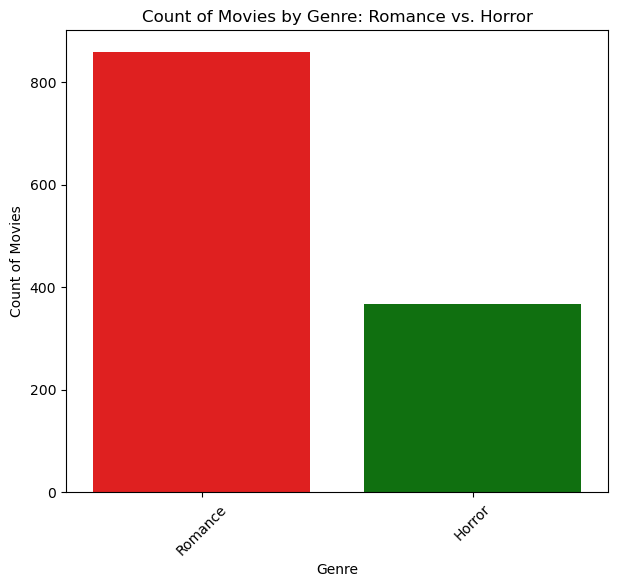

In [45]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data to get only "Romance" and "Horror" movies
filtered_df = df[df['Genres'].str.contains("Romance|Horror", case=False, na=False)].copy()  # Adding .copy() to avoid SettingWithCopyWarning

# Create a new 'Main_Genre' column to classify movies strictly into 'Romance' or 'Horror' (exclude "Mixed")
def classify_genre(genres):
    if 'Romance' in genres and 'Horror' not in genres:
        return 'Romance'
    elif 'Horror' in genres and 'Romance' not in genres:
        return 'Horror'
    else:
        return None  # Return None for genres that are "Mixed" or "Other"

# Apply the function and filter out any rows classified as None
filtered_df['Main_Genre'] = filtered_df['Genres'].apply(classify_genre)
filtered_df = filtered_df.dropna(subset=['Main_Genre'])  # Remove rows where 'Main_Genre' is None

# Plotting the count of each genre, excluding "Mixed"
plt.figure(figsize=(7, 6))
sns.countplot(x='Main_Genre', data=filtered_df, palette={"Romance": "red", "Horror": "green"})

# Adding titles and labels
plt.title("Count of Movies by Genre: Romance vs. Horror")
plt.xlabel("Genre")
plt.ylabel("Count of Movies")
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [47]:
filtered_df

,Movie Title,Genres,Director,Actor Name 1,Actor Name 2,Actor Name 3,IMDB Score,Actor 1 Facebook Likes,Actor 2 Facebook Likes,Actor 3 Facebook Likes,Budget_in_million,Gross_in_million,Profit,Main_Genre
6,Spider-Man 3,Action|Adventure|Romance,Sam Raimi,J.K. Simmons,James Franco,Kirsten Dunst,6.2,24000.0,11000.0,4000.0,258.0000,336.530303,78.530303,Romance
7,Tangled,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Nathan Greno,Brad Garrett,Donna Murphy,M.C. Gainey,7.8,799.0,553.0,284.0,260.0000,200.807262,-59.192738,Romance
25,King Kong,Action|Adventure|Drama|Romance,Peter Jackson,Naomi Watts,Thomas Kretschmann,Evan Parke,7.2,6000.0,919.0,84.0,207.0000,218.051260,11.051260,Romance
26,Titanic,Drama|Romance,James Cameron,Leonardo DiCaprio,Kate Winslet,Gloria Stuart,7.7,29000.0,14000.0,794.0,200.0000,658.672302,458.672302,Romance
31,Spider-Man 2,Action|Adventure|Fantasy|Romance,Sam Raimi,J.K. Simmons,James Franco,Kirsten Dunst,7.3,24000.0,11000.0,4000.0,200.0000,373.377893,173.377893,Romance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5023,Breaking Upwards,Romance,Daryl Wein,Zoe Lister-Jones,Heather Burns,Ebon Moss-Bachrach,6.2,331.0,212.0,211.0,0.0150,0.076382,0.061382,Romance
5025,Pink Flamingos,Comedy|Crime|Horror,John Waters,Divine,Mink Stole,Edith Massey,6.1,462.0,143.0,105.0,0.0100,0.180483,0.170483,Horror
5026,Clean,Drama|Music|Romance,Olivier Assayas,Maggie Cheung,Béatrice Dalle,Don McKellar,6.9,576.0,133.0,45.0,0.0045,0.136007,0.131507,Romance
5029,The Cure,Crime|Horror|Mystery|Thriller,Kiyoshi Kurosawa,Kôji Yakusho,Anna Nakagawa,Denden,7.4,89.0,13.0,6.0,1.0000,0.094596,-0.905404,Horror


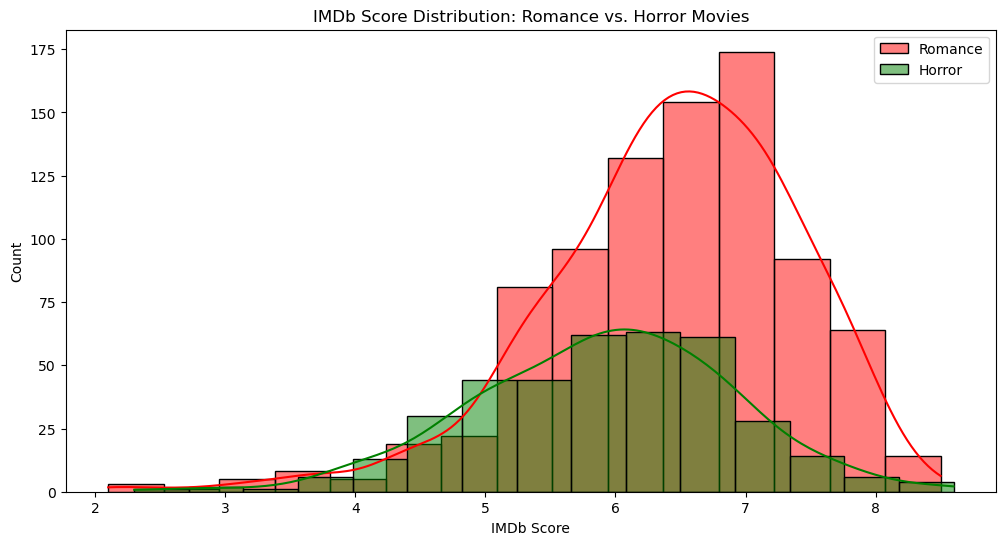

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter dataset for Romance and Horror movies
romance_movies = df[df['Genres'].str.contains("Romance", case=False, na=False)]
horror_movies = df[df['Genres'].str.contains("Horror", case=False, na=False)]

# Plot IMDb Score distributions
plt.figure(figsize=(12, 6))
sns.histplot(romance_movies['IMDB Score'], bins=15, color='red', kde=True, label='Romance')
sns.histplot(horror_movies['IMDB Score'], bins=15, color='green', kde=True, label='Horror')
plt.title("IMDb Score Distribution: Romance vs. Horror Movies")
plt.xlabel("IMDb Score")
plt.ylabel("Count")
plt.legend()
plt.show()

C:\Users\Harshada\AppData\Local\Temp\ipykernel_23576\3819951010.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Main_Genre', y='Budget_in_million', data=filtered_df,


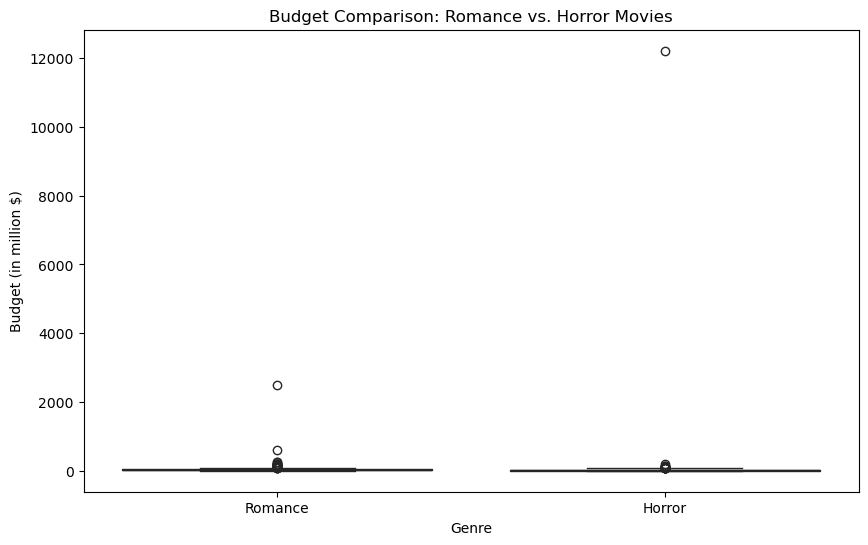

In [51]:
# Boxplot for Budget comparison without redundant hue parameter
plt.figure(figsize=(10, 6))
sns.boxplot(x='Main_Genre', y='Budget_in_million', data=filtered_df,
            palette={"Romance": "red", "Horror": "green"})

# Adding titles and labels
plt.title("Budget Comparison: Romance vs. Horror Movies")
plt.ylabel("Budget (in million $)")
plt.xlabel("Genre")
plt.show()


C:\Users\Harshada\AppData\Local\Temp\ipykernel_23576\47246905.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Main_Genre', y='Gross_in_million', data=filtered_df,


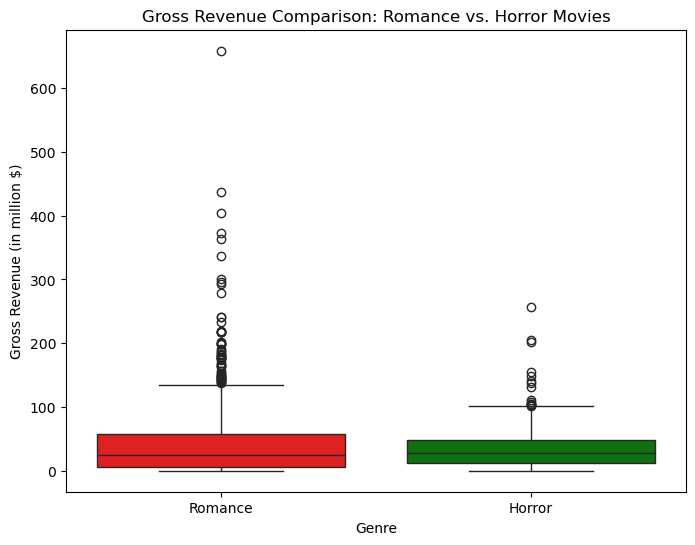

In [53]:
# Boxplot for Gross Revenue comparison without redundant hue parameter
plt.figure(figsize=(8,6))
sns.boxplot(x='Main_Genre', y='Gross_in_million', data=filtered_df,
            palette={"Romance": "red", "Horror": "green"})

# Adding titles and labels
plt.title("Gross Revenue Comparison: Romance vs. Horror Movies")
plt.ylabel("Gross Revenue (in million $)")
plt.xlabel("Genre")
plt.show()


C:\Users\Harshada\AppData\Local\Temp\ipykernel_21616\2760301766.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Main_Genre', y='Profit', data=filtered_df, palette={"Romance": "salmon", "Horror": "darkred"})


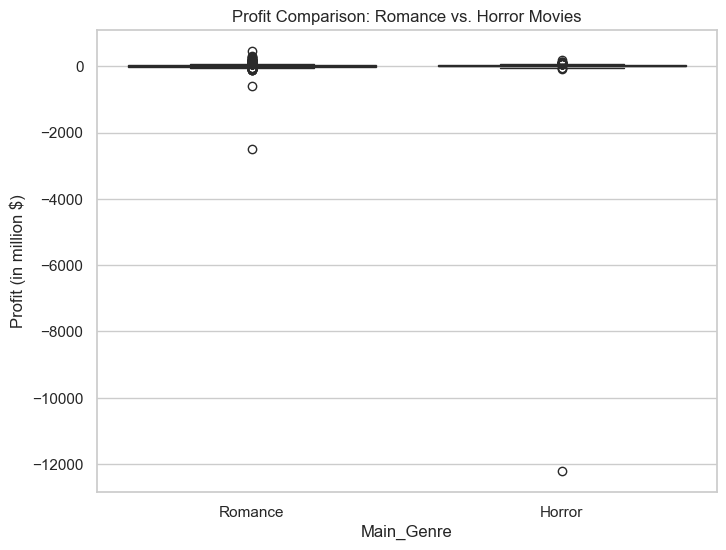

In [1360]:
# Plot boxplot for Profit
plt.figure(figsize=(8, 6))
sns.boxplot(x='Main_Genre', y='Profit', data=filtered_df, palette={"Romance": "salmon", "Horror": "darkred"})

# Title and labels
plt.title("Profit Comparison: Romance vs. Horror Movies")
plt.ylabel("Profit (in million $)")

# Show plot
plt.show()

C:\Users\Harshada\AppData\Local\Temp\ipykernel_23576\2338754979.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Main_Genre', y='IMDB Score', data=filtered_df, palette={"Romance": "red", "Horror": "green"})


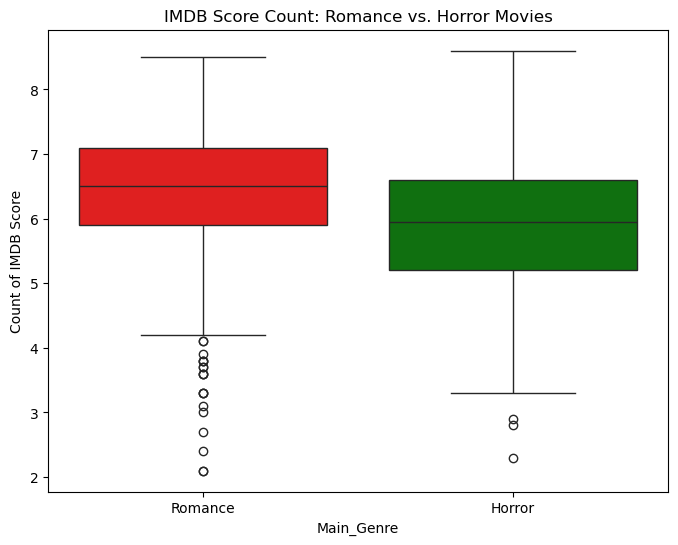

In [55]:
# Plot boxplot for IMDB Score
plt.figure(figsize=(8, 6))
sns.boxplot(x='Main_Genre', y='IMDB Score', data=filtered_df, palette={"Romance": "red", "Horror": "green"})

# Title and labels
plt.title("IMDB Score Count: Romance vs. Horror Movies")
plt.ylabel("Count of IMDB Score")

# Show plot
plt.show()

C:\Users\Harshada\AppData\Local\Temp\ipykernel_23576\3841363858.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Main_Genre'] = df['Genres'].apply(lambda x: 'Romance' if 'Romance' in x else ('Horror' if 'Horror' in x else 'Other'))


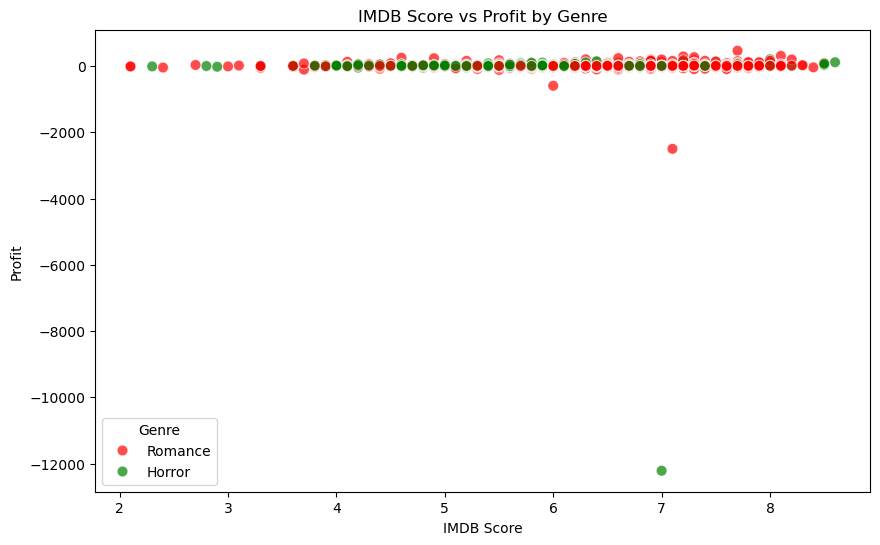

In [57]:
# Create a new column 'Main_Genre' to classify each movie as "Romance" or "Horror" based on Genres
df['Main_Genre'] = df['Genres'].apply(lambda x: 'Romance' if 'Romance' in x else ('Horror' if 'Horror' in x else 'Other'))

# Filter out movies that are neither "Romance" nor "Horror"
filtered_df = df[df['Main_Genre'].isin(['Romance', 'Horror'])]

# Scatter plot of IMDB Score vs. Profit, using 'Main_Genre' for color distinction
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='IMDB Score', y='Profit', hue='Main_Genre', palette={"Romance": "red", "Horror": "green"}, alpha=0.7, s=60)

# Add titles and labels
plt.title('IMDB Score vs Profit by Genre')
plt.xlabel('IMDB Score')
plt.ylabel('Profit')
plt.legend(title='Genre')
plt.show()

In [1365]:
# Function to remove outliers using the Z-score method
def remove_outliers_z(df, column, threshold=3):
    z_scores = zscore(df[column])
    abs_z_scores = abs(z_scores)
    filtered_entries = abs_z_scores < threshold
    return df[filtered_entries]

# Apply outlier removal on Budget, Gross, Profit, and IMDB Score columns
df = remove_outliers_z(df, 'Budget_in_million')
df = remove_outliers_z(df, 'Gross_in_million')
df = remove_outliers_z(df, 'Profit')
df = remove_outliers_z(df, 'IMDB Score')


In [1367]:
final_row_count = len(df)

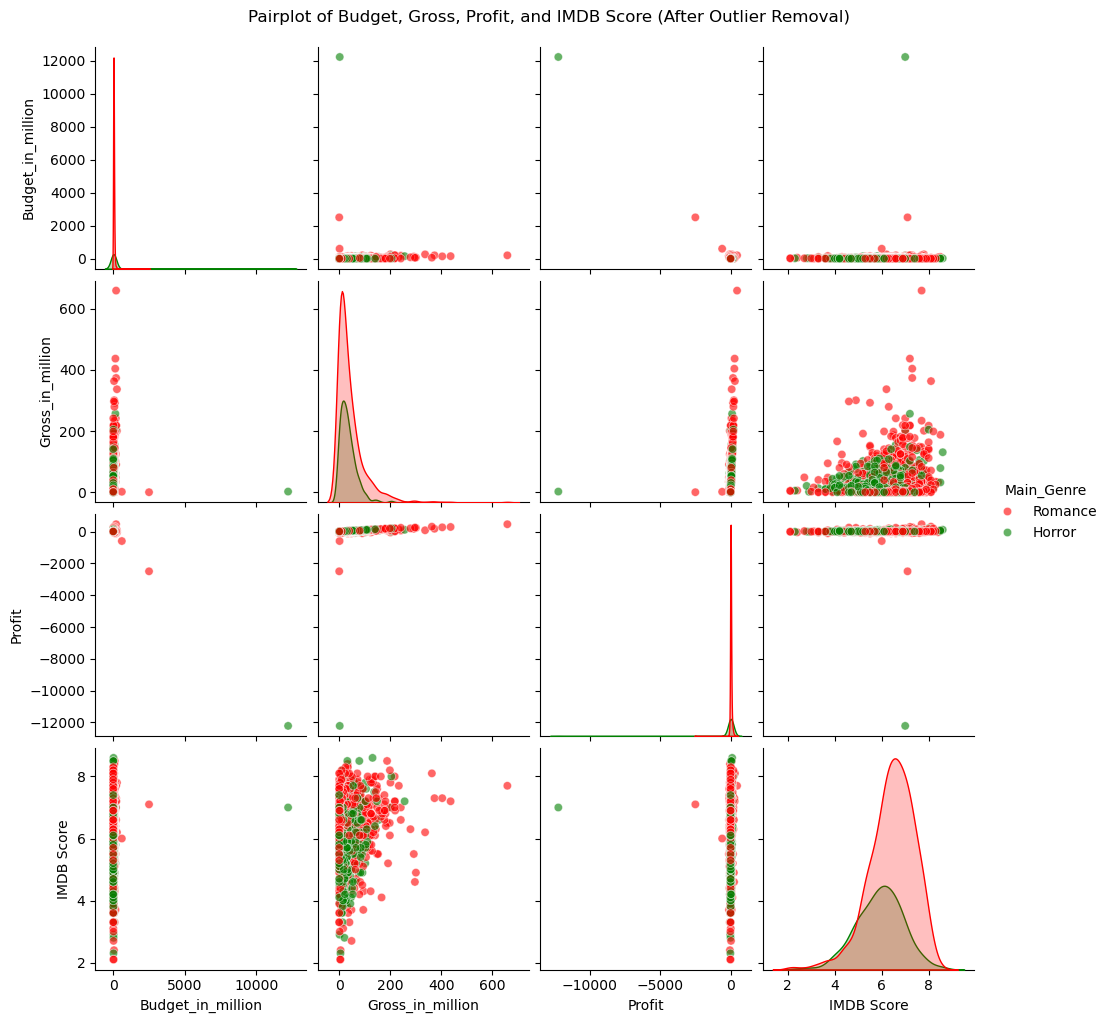

In [59]:
# 1. Pairplot to include Budget, Gross, Profit, and IMDB Score for both genres
sns.pairplot(filtered_df,
             vars=['Budget_in_million', 'Gross_in_million', 'Profit', 'IMDB Score'],
             hue='Main_Genre',
             palette={"Romance": "red", "Horror": "green"},
             plot_kws={'alpha': 0.6})
plt.suptitle("Pairplot of Budget, Gross, Profit, and IMDB Score (After Outlier Removal)", y=1.02)
plt.show()


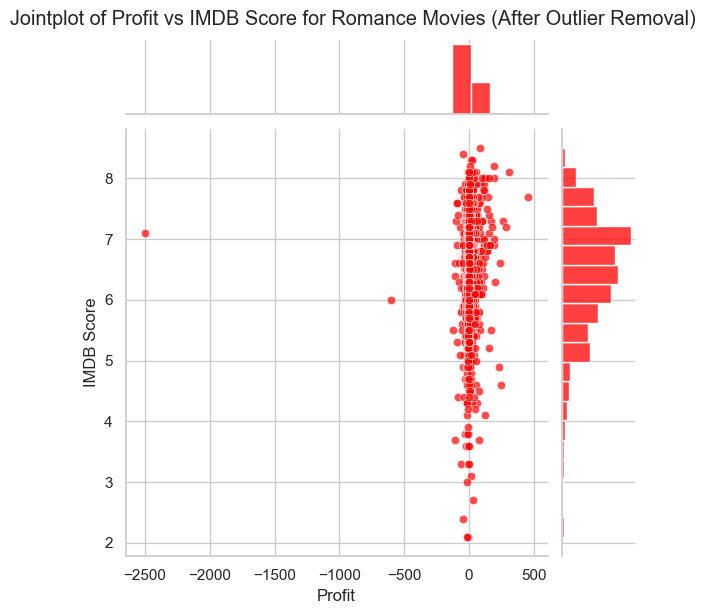

In [61]:
# Filtered DataFrame for Romance genre and check for required columns
romance_df = filtered_df[filtered_df['Main_Genre'] == 'Romance'].dropna(subset=['Profit', 'IMDB Score'])

# Plotting with seaborn's jointplot
sns.set(style="whitegrid")
sns.jointplot(data=romance_df,
              x='Profit', y='IMDB Score',
              kind='scatter', color="red", alpha=0.7,
              marginal_kws={'bins': 20, 'fill': True})

plt.suptitle("Jointplot of Profit vs IMDB Score for Romance Movies (After Outlier Removal)", y=1.02)
plt.show()


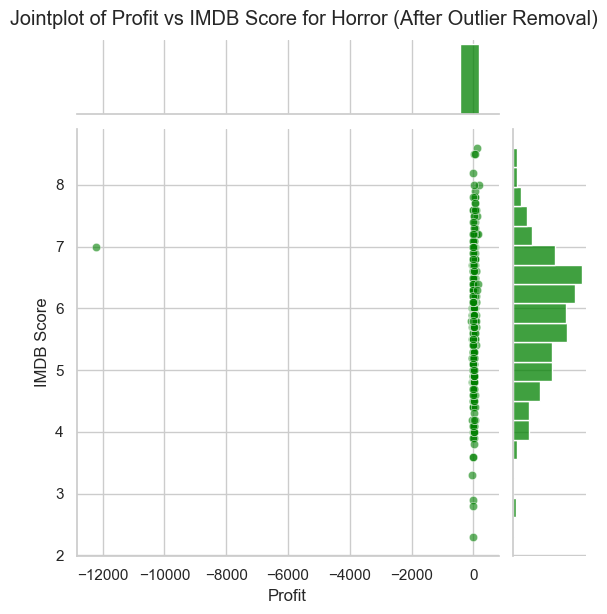

In [63]:
# 3. Jointplot for Profit vs IMDB Score for Horror movies
sns.jointplot(data=filtered_df[filtered_df['Main_Genre'] == 'Horror'],
              x='Profit', y='IMDB Score',
              kind='scatter', color="green", alpha=0.6,
              marginal_kws=dict(bins=20, fill=True))
plt.suptitle("Jointplot of Profit vs IMDB Score for Horror (After Outlier Removal)", y=1.02)
plt.show()

In [1376]:
romance_data = filtered_df[filtered_df['Main_Genre'] == 'Romance']
romance_data

,Movie Title,Genres,Director,Actor Name 1,Actor Name 2,Actor Name 3,IMDB Score,Actor 1 Facebook Likes,Actor 2 Facebook Likes,Actor 3 Facebook Likes,Budget_in_million,Gross_in_million,Profit,Main_Genre
6,Spider-Man 3,Action|Adventure|Romance,Sam Raimi,J.K. Simmons,James Franco,Kirsten Dunst,6.2,24000.0,11000.0,4000.0,258.0000,336.530303,78.530303,Romance
7,Tangled,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Nathan Greno,Brad Garrett,Donna Murphy,M.C. Gainey,7.8,799.0,553.0,284.0,260.0000,200.807262,-59.192738,Romance
25,King Kong,Action|Adventure|Drama|Romance,Peter Jackson,Naomi Watts,Thomas Kretschmann,Evan Parke,7.2,6000.0,919.0,84.0,207.0000,218.051260,11.051260,Romance
26,Titanic,Drama|Romance,James Cameron,Leonardo DiCaprio,Kate Winslet,Gloria Stuart,7.7,29000.0,14000.0,794.0,200.0000,658.672302,458.672302,Romance
31,Spider-Man 2,Action|Adventure|Fantasy|Romance,Sam Raimi,J.K. Simmons,James Franco,Kirsten Dunst,7.3,24000.0,11000.0,4000.0,200.0000,373.377893,173.377893,Romance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4998,Smiling Fish & Goat on Fire,Comedy|Romance,Kevin Jordan,Derick Martini,Christa Miller,Ion Overman,7.6,20000.0,467.0,113.0,0.0400,0.277233,0.237233,Romance
5021,The Puffy Chair,Comedy|Drama|Romance,Jay Duplass,Mark Duplass,Katie Aselton,Bari Hyman,6.6,830.0,224.0,10.0,0.0150,0.192467,0.177467,Romance
5023,Breaking Upwards,Romance,Daryl Wein,Zoe Lister-Jones,Heather Burns,Ebon Moss-Bachrach,6.2,331.0,212.0,211.0,0.0150,0.076382,0.061382,Romance
5026,Clean,Drama|Music|Romance,Olivier Assayas,Maggie Cheung,Béatrice Dalle,Don McKellar,6.9,576.0,133.0,45.0,0.0045,0.136007,0.131507,Romance


In [1377]:
horror_data = filtered_df[filtered_df['Main_Genre'] == 'Horror']
horror_data

,Movie Title,Genres,Director,Actor Name 1,Actor Name 2,Actor Name 3,IMDB Score,Actor 1 Facebook Likes,Actor 2 Facebook Likes,Actor 3 Facebook Likes,Budget_in_million,Gross_in_million,Profit,Main_Genre
46,World War Z,Action|Adventure|Horror|Sci-Fi|Thriller,Marc Forster,Peter Capaldi,Brad Pitt,Mireille Enos,7.0,17000.0,11000.0,1000.0,190.00,202.351611,12.351611,Horror
72,The Mummy: Tomb of the Dragon Emperor,Action|Adventure|Fantasy|Horror|Thriller,Rob Cohen,Jet Li,Brendan Fraser,Russell Wong,5.2,5000.0,3000.0,595.0,145.00,102.176165,-42.823835,Horror
117,I Am Legend,Drama|Horror|Sci-Fi,Francis Lawrence,Will Smith,Alice Braga,Willow Smith,7.2,10000.0,1000.0,558.0,150.00,256.386216,106.386216,Horror
134,Dark Shadows,Comedy|Fantasy|Horror,Tim Burton,Johnny Depp,Chloë Grace Moretz,Christopher Lee,6.2,40000.0,17000.0,16000.0,100.00,79.711678,-20.288322,Horror
136,The Wolfman,Drama|Fantasy|Horror|Thriller,Joe Johnston,Anthony Hopkins,Simon Merrells,Art Malik,5.8,12000.0,490.0,162.0,150.00,61.937495,-88.062505,Horror
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4956,The Gallows,Horror|Thriller,Travis Cluff,Pfeifer Brown,Cassidy Gifford,Reese Mishler,4.2,220.0,40.0,7.0,0.10,22.757819,22.657819,Horror
4962,The Lost Skeleton of Cadavra,Comedy|Horror|Sci-Fi,Larry Blamire,Fay Masterson,Brian Howe,Larry Blamire,7.0,126.0,76.0,56.0,0.04,0.110536,0.070536,Horror
4964,Cheap Thrills,Comedy|Crime|Drama|Horror|Thriller,E.L. Katz,Brighton Sharbino,Ethan Embry,Elissa Dowling,6.8,3000.0,982.0,307.0,0.20,0.059379,-0.140621,Horror
5025,Pink Flamingos,Comedy|Crime|Horror,John Waters,Divine,Mink Stole,Edith Massey,6.1,462.0,143.0,105.0,0.01,0.180483,0.170483,Horror


In [1378]:
import scipy.stats as stats

# Separate the data into two groups based on Genre_Category
romance_data = filtered_df[filtered_df['Main_Genre'] == 'Romance']
horror_data = filtered_df[filtered_df['Main_Genre'] == 'Horror']

# 1. Hypothesis Test for Profit Differences (Two-Sample T-Test)

# Null Hypothesis (H0): The mean profit of Romance movies is equal to the mean profit of Horror movies.
# Alternative Hypothesis (H1): The mean profit of Romance movies is different from the mean profit of Horror movies.

# Perform the independent two-sample t-test on 'Profit'
t_statistic_profit, p_value_profit = stats.ttest_ind(romance_data['Profit'], horror_data['Profit'], equal_var=False)

print("Hypothesis Test for Profit Differences")
print("T-statistic:", t_statistic_profit)
print("P-value:", p_value_profit)
if p_value_profit < 0.05:
    print("Reject the null hypothesis: Significant difference in mean profit between Romance and Horror movies.")
else:
    print("Fail to reject the null hypothesis: No significant difference in mean profit between Romance and Horror movies.")

# 2. Hypothesis Test for IMDB Score Differences

# Null Hypothesis (H0): The mean IMDB score of Romance movies is equal to the mean IMDB score of Horror movies.
# Alternative Hypothesis (H1): The mean IMDB score of Romance movies is different from the mean IMDB score of Horror movies.

# Perform the independent two-sample t-test on 'IMDB Score'
t_statistic_imdb, p_value_imdb = stats.ttest_ind(romance_data['IMDB Score'], horror_data['IMDB Score'], equal_var=False)

print("\nHypothesis Test for IMDB Score Differences")
print("T-statistic:", t_statistic_imdb)
print("P-value:", p_value_imdb)
if p_value_imdb < 0.05:
    print("Reject the null hypothesis: Significant difference in mean IMDB score between Romance and Horror movies.")
else:
    print("Fail to reject the null hypothesis: No significant difference in mean IMDB score between Romance and Horror movies.")


Hypothesis Test for Profit Differences
T-statistic: 0.878211231996394
P-value: 0.3803919513838788
Fail to reject the null hypothesis: No significant difference in mean profit between Romance and Horror movies.

Hypothesis Test for IMDB Score Differences
T-statistic: 8.458446404720334
P-value: 1.6791810814684286e-16
Reject the null hypothesis: Significant difference in mean IMDB score between Romance and Horror movies.


In [1379]:
romance_data.describe().loc[['mean', 'std', '50%','75%', 'max']][['IMDB Score', 'Profit']]

,IMDB Score,Profit
mean,6.425862,9.517005
std,0.968852,100.009480
50%,6.500000,1.569856
75%,7.100000,24.322204
max,8.500000,458.672302


In [1380]:
horror_data.describe().loc[['mean', 'std', '50%','75%', 'max']][['IMDB Score', 'Profit']]

,IMDB Score,Profit
mean,5.906250,-19.845236
std,0.995844,638.071456
50%,5.950000,6.601891
75%,6.600000,23.875779
max,8.600000,196.565000


In [1381]:
# Calculate and display mean values for each metric by genre
mean_profit_romance = romance_data['Profit'].mean()
mean_profit_horror = horror_data['Profit'].mean()
mean_imdb_romance = romance_data['IMDB Score'].mean()
mean_imdb_horror = horror_data['IMDB Score'].mean()


print("\nMean Metrics by Genre")
print("Mean Profit - Romance:", mean_profit_romance)
print("Mean Profit - Horror:", mean_profit_horror)
print("Mean IMDB Score - Romance:", mean_imdb_romance)
print("Mean IMDB Score - Horror:", mean_imdb_horror)




Mean Metrics by Genre
Mean Profit - Romance: 9.517005209195402
Mean Profit - Horror: -19.84523629891304
Mean IMDB Score - Romance: 6.425862068965517
Mean IMDB Score - Horror: 5.90625


In [1382]:
# Top 10 Directors based on Profit and IMDB Score
# Group by Director and aggregate the Profit and IMDB Score
top_directors = df.groupby('Director').agg(
    Average_Profit=('Profit', 'mean'),
    Average_IMDB_Score=('IMDB Score', 'mean')
).sort_values(by='Average_Profit', ascending=False).head(10)

# Display top directors
print("Top 10 Directors based on Profit and IMDB Score:")
print(top_directors)



# Top 10 Actors based on Profit and IMDB Score
# Consolidate the actor columns to aggregate performance across all actors
actors = pd.concat([
    df[['Actor Name 1', 'Profit', 'IMDB Score']].rename(columns={'Actor Name 1': 'Actor'}),
    df[['Actor Name 2', 'Profit', 'IMDB Score']].rename(columns={'Actor Name 2': 'Actor'}),
    df[['Actor Name 3', 'Profit', 'IMDB Score']].rename(columns={'Actor Name 3': 'Actor'})
])

# Group by Actor and aggregate Profit and IMDB Score
top_actors = actors.groupby('Actor').agg(
    Average_Profit=('Profit', 'mean'),
    Average_IMDB_Score=('IMDB Score', 'mean')
).sort_values(by='Average_Profit', ascending=False).head(10)

# Display top actors
print("\nTop 10 Actors based on Profit and IMDB Score:")
print(top_actors)

# Top 10 Movies based on Profit and IMDB Score
# Calculate rankings for movies based on Profit and IMDB Score
df['Profit_Rank'] = df['Profit'].rank(ascending=False)
df['IMDB_Score_Rank'] = df['IMDB Score'].rank(ascending=False)

# Calculate combined rank
df['Combined_Rank'] = df['Profit_Rank'] + df['IMDB_Score_Rank']

# Sort movies by combined rank and select top 10
top_movies = df.sort_values(by='Combined_Rank').head(10)

# Display top 10 movies with relevant details
print("\nTop 10 Movies based on combined Profit and IMDB Score ranks:")
print(top_movies[['Movie Title', 'Profit', 'IMDB Score', 'Combined_Rank']])


Top 10 Directors based on Profit and IMDB Score:
                    Average_Profit  Average_IMDB_Score
Director                                              
Daniel Myrick           140.470114                6.40
Sam Taylor-Johnson      126.147885                4.10
George Lucas            114.223000                7.50
Josh Boone              112.868837                7.80
Peter Farrelly          111.175354                7.30
David Silverman         108.132370                7.40
Oren Peli               107.902283                6.30
Penelope Spheeris       101.697350                7.00
Bob Clark               101.500000                6.20
John G. Avildsen         99.537623                7.65

Top 10 Actors based on Profit and IMDB Score:
                     Average_Profit  Average_IMDB_Score
Actor                                                  
Bridgit Mendler          144.613391                4.50
Nick Searcy              143.630478                7.70
Michael C. Williams 

In [1383]:
print("Top Director based on Profit and IMDB Score:")
print(top_directors.index[0])

Top Director based on Profit and IMDB Score:
Daniel Myrick


In [1384]:
print("Top Actor based on Profit and IMDB Score:")
print(top_actors.index[0])

Top Actor based on Profit and IMDB Score:
Bridgit Mendler


C:\Users\Harshada\AppData\Local\Temp\ipykernel_21616\1815817158.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genres_split', y='IMDB Score', data=top_5_genres_data, palette="Set2")


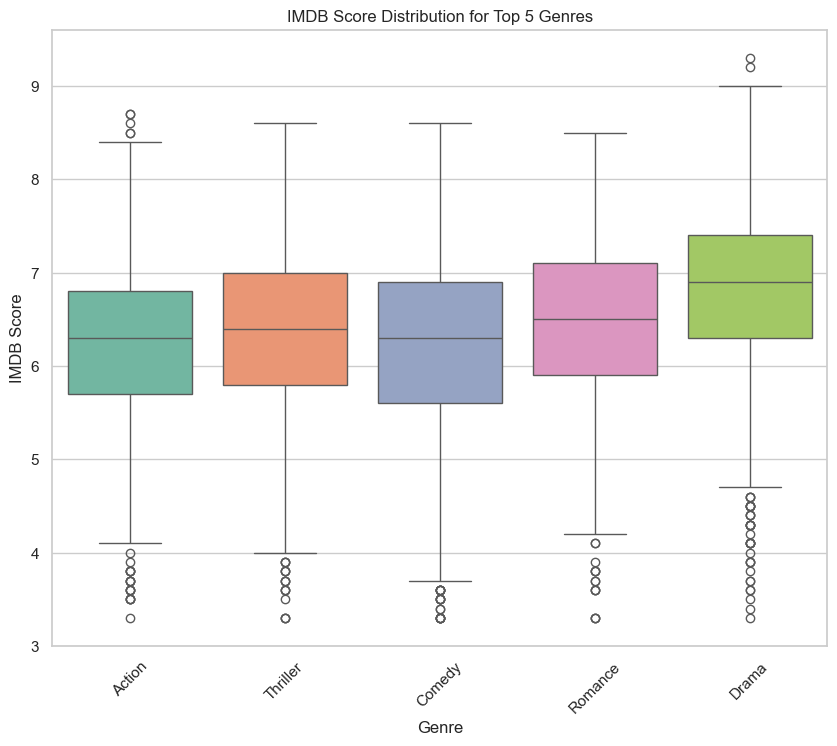

Summary Statistics for IMDB Scores by Genre:
               count      mean       std  min  25%  50%  75%  max
Genres_split                                                     
Action         867.0  6.232295  0.956668  3.3  5.7  6.3  6.8  8.7
Comedy        1429.0  6.195171  0.950570  3.3  5.6  6.3  6.9  8.6
Drama         1873.0  6.784250  0.869542  3.3  6.3  6.9  7.4  9.3
Romance        840.0  6.442262  0.912599  3.3  5.9  6.5  7.1  8.5
Thriller      1069.0  6.363330  0.942406  3.3  5.8  6.4  7.0  8.6


In [1385]:
# Code to display top 5 genre based on IMDB Score

df['Genres_split'] = df['Genres'].str.split('|')

df_exploded = df.explode('Genres_split')


genre_counts = df_exploded['Genres_split'].value_counts()


top_5_genres = genre_counts.head(5)


top_5_genres_data = df_exploded[df_exploded['Genres_split'].isin(top_5_genres.index)]

# Step 6: Plot the IMDB score distribution for the top 5 genres
plt.figure(figsize=(10, 8))
sns.boxplot(x='Genres_split', y='IMDB Score', data=top_5_genres_data, palette="Set2")
plt.title("IMDB Score Distribution for Top 5 Genres")
plt.xlabel("Genre")
plt.ylabel("IMDB Score")
plt.xticks(rotation=45)
plt.show()

# Step 7: Display summary statistics for IMDB Score for these top 5 genres
summary_stats = top_5_genres_data.groupby('Genres_split')['IMDB Score'].describe()

# Display summary statistics
print("Summary Statistics for IMDB Scores by Genre:")
print(summary_stats)
